<img src="./logo_utn_frba.jpg" width="500">

* ### ***Ingeniería Electrónica***
* ### ***Teoría de los Circuitos II***
* #### *Torres Molina Emmanuel O.*
* #### **Legajo:** 146568-5

 * ##  Desafío Filtro Pasa-Bajos:

1) *Diseñar un Filtro Pasa-Bajos cuyos Requerimientos son:*

$$\bullet fp = 500 Hz$$

$$\bullet fs = 1500 Hz$$

$$\bullet \alpha_{máx} = 1dB$$

$$\bullet \alpha_{mín} = 1dB$$

# Respuestas al Desafío:

In [10]:
# Paquetes y Módulos que Utilizo de Python en Jupyter

# Para que los Gráficos me los realice en el notebook
%matplotlib inline 

from scipy.signal import TransferFunction as tf
import scipy.signal as sig
from splane import bodePlot, pzmap, convert2SOS
import numpy as np

# Plantilla de Requerimientos:
a_max = 1 # Atenuación Máxima en la Banda de Paso [dB]
a_min = 18 # Atenuación mínima en la Banda de Stop [dB]

# Frecuencias y Pulsaciones Angulares:
fp = 500         # [Hz]
fs = 1500        # [Hz]
wp = 2 * np.pi * fp       # [rad/seg]
ws = 2 * np.pi * fs       # [rad/seg]

# Valores Normalizados
wp_prima = wp / wp
ws_prima = ws / wp

# Calculo del epsilon
eps = np.sqrt (10 ** (a_max/10) - 1) #Ripple 

# a) Filtro Pasa-Bajos Máxima Planicidad:

In [11]:
# Cálculo y Valores Obtenidos de la Plantilla Solicitada para Máxima Planicidad:

# Orden del Filtro
N = np.log10 (((10 ** (a_min/10) - 1) / eps**2)) / (2 * np.log10 (ws_prima))
N = np.ceil ( N ) # Redondeo para Arriba

wb = eps**( -1 / N ) * wp_prima # Cálculo del Wb.

print ("El valor del epsilon obtenido es: ", eps)
print ("\nEl Orden del Filtro es: ", N)
print ("\nwb = ", wb)


El valor del epsilon obtenido es:  0.5088471399095875

El Orden del Filtro es:  3.0

wb =  1.2525763881810263


In [12]:
# Cálculo de la Transferencia Normalizada Usando las Herramientas y Métodos encapsulados dentro del Paquete Signal de Scipy:

z, p, k = sig.buttap(N) # Me Devuelve los Ceros, Polos y Ganancia para el Orden Especificado.
z, p, k

(array([], dtype=float64),
 array([-0.5+0.8660254j, -1. -0.j       , -0.5-0.8660254j]),
 1)

In [13]:
# Numerador y Denominador de mi Transferencia Normalizada:
NUM, DEN = sig.zpk2tf ( z, p, k )
NUM, DEN

(array([1.]), array([1., 2., 2., 1.]))

In [15]:
# Transferencia Normalizada de Butterworth:
my_tf_bw = tf (NUM, DEN)
my_tf_bw

TransferFunctionContinuous(
array([1.]),
array([1., 2., 2., 1.]),
dt: None
)

In [19]:
# Me Devuelve Factorizado el Denominador de la Transferencia Normalizada: ==> ($^2 + $ + 1)*($+1)
convert2SOS(my_tf_bw)

array([[1., 1., 1.],
       [0., 1., 1.]])

In [1]:
# Si estamos en un Caso de un Filtro Butterworth Puro (eps = 1) No hace Falta Descomentar.

# Suponiendo que se ha hecho una Renormalización a Nivel de Frecuencia: Norma: wb
# Sirve únicamente cuando eps != 1 o a_max != 3 [dB] ==> Caso Máxima Planicidad
# Descomentar las líneas de abajo sólo si se quiere Desnormalizar, y Realizar un Ploteo del 
# Módulo y la Fase de la Transferencia Normalizada y el Diagrama de Polos y Ceros. 

#NUM, DEN = sig.lp2lp (NUM, DEN, wb)

#wb, NUM, DEN

In [11]:
#my_tf_mp = tf (NUM, DEN)
#my_tf_mp

In [12]:
#bodePlot ( my_tf_mp )
#pzmap ( my_tf_mp )



* ##### **Imágenes Correspondientes a la Resolución del Ejercicio:**

**$$Hoja Nro. 1:$$**
<img src="./max_planic_hoja1.jpeg" width = "500">

**$$ Hoja Nro. 2:$$**
<img src='./max_planic_hoja2.jpeg' width = "500">

* #### *Como se Observa en las Imágenes de Arriba, la Transferencia Pasa-Bajos de Máxima Planicidad Obtenida es:*

$$T_{LP_N}($) = \frac{1}{$ + 1} \ast \frac{1}{$^2 + $ + 1} = \frac{1}{$^3 + 2$^2 + 2$ + 1}$$

#### *Conclusiones:*
* *Para poder Diseñar este Filtro Pasa-Bajos voy a Necesitar 2 Secciones en Total: Una sección va a ser de 2do Orden y la otra sección va a ser de 1er Orden ==> RTA:* **NO** *se Puede Diseñar el Filtro para la Plantilla Pedida con 1 sola Sección de Segundo Orden.*

* *Voy a Necesitar al Menos 2 Etapas.*

* *El Epsilon y el Orden del Filtro calculado coincide con el Valor Obtenido en Python.*

* *La Función Transferencia Calculada coincide con la Función Transferencia que devuelve Python.*

# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------




# b) Filtro Pasa-Bajos Chebyshev:

In [13]:
# Cálculo y Valores Obtenidos de la Plantilla Solicitada para Chebyshev:

# Orden del Filtro
N = np.arccosh ( np.sqrt (10**(a_min/10)/eps**2)) /  np.arccosh(ws_prima)  
N = np.ceil ( N ) # Redondeo para Arriba

print ("El valor del epsilon obtenido es: ", eps)
print ("\nEl Orden del Filtro es: ", N)


El valor del epsilon obtenido es:  0.5088471399095875

El Orden del Filtro es:  2.0


* *Como era de Esperarse el epsilon calculado en el Diseño del Filtro de Máxima Planicidad **COINCIDE** con el epsilon calculado en el Filtro de Chebyshev.*

* *Se Comprueba que un Filtro Chebyshev implica un **Orden Menor** que un Filtro Butterworth o Máxima Planicidad para los mismos requerimientos de Plantilla.*

### **Transferencia Normalizada Obtenida a partir de los cálculos realizados usando la  Aproximación de Chebyshev:**


$$T_{LP_N}($) = \frac{1}{1.018$^2 + 1.117$ + 1.122}$$







* *Sabemos que la **Forma Canónica y Parametrizada** de cualquier Transferencia de 2do Orden Normalizada Pasa-Bajos es:*

$$T_{LP}($) = K * \frac{\omega_0^2}{$^2 + \frac{\omega_0}{Q}$ + \omega_0^2}$$

## ----------------------------------------------------------------------------------------------------------------------------------

* ###  *Sacando "Factor Común" y Dejando como 1 el Coeficiente del Término Cuadrático del Denominador Obtengo:*

$$T_{LP1_N}($) = \frac{0.982}{$^2 + 1.097$ + 1.102}$$


*Observamos que el Coeficiente del Numerador se obtuvo a partir de la Siguiente División:* $$\frac{1}{1.018} = 0.982$$


*De esta forma la Transferencia Normalizada NO queda de Forma Canónica:* 


$$|T(0)| = \frac{0.982}{1.102} = 0.891 = K ==> K \neq |T(0)| \neq \frac{w0i^2}{w0i^2} \neq 1$$



In [49]:
# Obtengo los Ceros, Polos y K (Ganancia) de mi Diseño:
z1 = np.array ( [] )
p1 = np.roots ( [1, 1.097, 1.102] )
k1 = 0.982

# Transferencia de mi Filtro:
NUM1, DEN1 = sig.zpk2tf ( z1, p1, k1 )
my_tf1 = tf (NUM1, DEN1)

In [50]:
# Muestro los Resultados de Ceros, Polos, Ganancia y Transferencia Normalizada Obtenidos:
z1, p1, k1

(array([], dtype=float64),
 array([-0.5485+0.89506857j, -0.5485-0.89506857j]),
 0.982)

In [52]:
# Transferencia Normalizada Obtenida:
my_tf1

TransferFunctionContinuous(
array([0.982]),
array([1.   , 1.097, 1.102]),
dt: None
)

In [53]:
# Factor de Selectividad o Mérito Q:
qq1 = np.sqrt (DEN1[2]) / DEN1[1]
qq1

0.9569388129087119

(1,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A20241BAC8>,
       dtype=object))

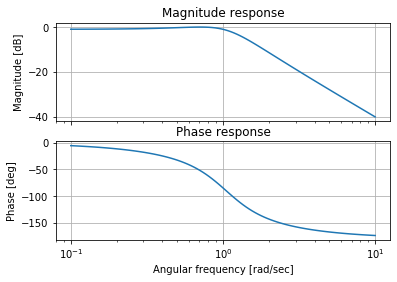

In [54]:
# Respuesta de Módulo y Fase:
bodePlot(my_tf1)

(1, <matplotlib.axes._subplots.AxesSubplot at 0x2a2025c9a08>)

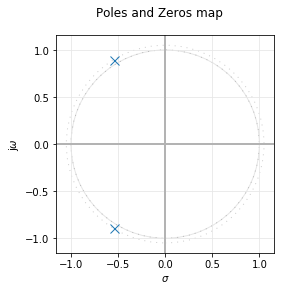

In [55]:
# Diagrama de Polos y Ceros:
pzmap (my_tf1)

### c) Síntesis y Simulación del Filtro ChebyShev Calculado:

* *El diseño del Filtro Pedido se realiza mediante la Estructura **Ackenberg Mossberg** tomando como la Salida Pasa-Bajos.*


* *La Transferencia LP de dicha Estructura es la Siguiente:*


$$T_{LP_{ACKMOSS}}($) = \frac{-K}{R.R1.C^2} * \frac{1}{$^2 + \frac{1}{Q.R.C}$ + \frac{1}{R1^2.C^2}}$$

### $$Circuito:$$
<img src='./Ejercicio_Chebyshev_circuito.jpg' width = "800">

### $$Simulación:$$
<img src='./Ejercicio_Chebyshev_simulacion.jpg' width = "1000">

* **Link para descargar el archivo que contiene el circuito para realizar la Simulación en LTSpice (.asc)  :**
[Ejercicio_Chebyshev.zip](https://github.com/eotorresmolina/UTN-FRBA/blob/master/TCII/Desafio/Ejercicio_Chebyshev.zip?raw=true)

# ---------------------------------------------------------------------------------------------------------------

### Conclusiones de la Simulación Pasa-Bajos Chebyshev Obtenidas:

* *Se Observa que en la Simulación entrega un Filtro LP con una pequeña atenuación en la banda de paso que es de aprox. 1 dB (el módulo vale -1dB), se puede observar que se cumplen los requerimientos obtenidos, tanto para fp como para fs (en fs atenúa más de lo pedido).*


* *De lo dicho arriba podemos concluir, que al ser el Orden Par (N=2) observamos que el Filtro Comienza en un valor Igual a:*


$$10*log_{10}({\frac{1}{1+\epsilon^2}})$$

*Donde reemplazando el valor de epsilon obtenido, el módulo vale -1dB, que es justamente lo esperado, y por lo tanto, también dicho filtro pasa para el valor de fp en -1dB*


* *Finalmente como también es esperado, el filtro posee oscilaciones ecualizadas, 2 Toques (1 mínimo y 1 Máximo) y N-1 = 2 - 1 = 1 oscilaciones.*
